# Synthetic Data Fit

In [1]:
from drdmannturb.calibration import CalibrationProblem
from drdmannturb.data_generator import OnePointSpectraDataGenerator
from drdmannturb.shared.parameters import NNParameters, ProblemParameters, LossParameters, PhysicalParameters

import torch
import torch.nn as nn
import numpy as np

L = 0.59

Gamma = 3.9
sigma = 3.4

domain = torch.logspace(-1, 2, 20)

In [8]:
pb = CalibrationProblem(
    nn_params = NNParameters(
        activations = [nn.GELU(), nn.GELU(), nn.GELU()], 
    ),
    prob_params = ProblemParameters(nepochs=5),
    loss_params = LossParameters(),
    phys_params = PhysicalParameters(
        L=0.59,
        Gamma=3.9,
        sigma=3.4,
        domain=domain
    )
)

In [9]:
parameters = pb.parameters
parameters[:3] = [
    np.log(L),
    np.log(Gamma),
    np.log(sigma)
]

pb.parameters = parameters[:len(pb.parameters)]

k1_data_pts = domain
DataPoints = [(k1, 1) for k1 in k1_data_pts]

In [10]:
Data = OnePointSpectraDataGenerator(data_points=DataPoints).Data

In [11]:
pb.eval(k1_data_pts)
pb.calibrate(data=Data)


Calibrating MannNet...
torch.Size([80])
Initial loss:  0.13733447610726598

[Calibration.py -- calibrate]-> Epoch 0

loss  =  0.13733447610726598
loss  =  0.09577321999904204
loss  =  0.08473322461483648
loss  =  0.07583354150840951
loss  =  0.06863751983199469
loss  =  0.06281739164471366
loss  =  0.05810846710551777
loss  =  0.05429715133886519
loss  =  0.05121113347189212
loss  =  0.048711144238862865
loss  =  0.04668509104852417
loss  =  0.045041929145097796
loss  =  0.04370867300521997
loss  =  0.03804459732674255
loss  =  0.03804246331734337
loss  =  0.03802331377276161
loss  =  0.037929186428490615
loss  =  0.0370911340374638
loss  =  0.03677059594819394
loss  =  0.03553777175531828
loss  =  0.035274048686232594
loss  =  0.03412393351453484
loss  =  0.09537106170843113
loss  =  0.03376055183804838
loss  =  0.03297954996101806
---------------------------------



[Calibration.py -- calibrate]-> Epoch 1



/home/ai/miniconda3/envs/fracturbulence/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:163: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


loss  =  0.03297954996101806
loss  =  0.03196335159434101
loss  =  0.03183933652416877
loss  =  0.03144670493943784
loss  =  0.03129200392036003
loss  =  0.030296760235250325
loss  =  0.030119556275099536
loss  =  0.029132009932168967
loss  =  0.028897980120184595
loss  =  0.02774230910695711
loss  =  0.027021530837173756
loss  =  0.024929886674152666
loss  =  0.02463698529060135
loss  =  0.02342880287619218
loss  =  0.023153551776209362
loss  =  0.021781853978432207
loss  =  0.02171145305368962
loss  =  0.021653906881560075
loss  =  0.02160646748297909
loss  =  0.021368895893275293
loss  =  0.021338209275737714
loss  =  0.021149439696952602
loss  =  0.021120692218235624
loss  =  0.021019265926353514
loss  =  0.020988886168032406
---------------------------------



[Calibration.py -- calibrate]-> Epoch 2

loss  =  0.020988886168032406
loss  =  0.020961483285054865
loss  =  0.02083663784240264
loss  =  0.020820462922709542
loss  =  0.020700854189633144
loss  =  0.020630009117677046
los

array([-0.48225492,  0.20245099,  0.98569305,  0.31800342,  0.49994573,
       -0.10938495, -0.27162092, -0.08183015,  0.36671432, -0.22870026,
        0.0255545 ,  0.5202842 , -0.43591645, -0.36797473, -0.32576072,
        0.28516144,  0.05712905,  0.21718402,  0.23584537,  0.80673228,
       -0.24395448, -0.6258425 , -0.21818991,  0.68212743, -0.18106882,
        0.20313334,  0.32785456, -0.0511313 , -0.426332  , -0.1250616 ,
       -0.57430214,  0.33519111,  0.34150453, -0.3202143 , -0.17856408,
       -0.18301787, -0.05787928, -0.13509537,  0.11447774,  0.15021502,
       -0.08281267, -0.26703992,  0.19379209,  0.24879409,  0.06541152,
       -0.13366423,  0.03531979, -0.09847864,  0.40169351,  0.57327638,
       -0.14794334, -0.29434964,  0.19568031,  0.4831396 ,  0.22073171,
       -0.18795003, -0.15657082,  0.2477741 ,  0.31138627,  0.02844618,
        0.17044068,  0.10088021, -0.19567149, -0.21466149,  0.00524973,
       -0.33725479,  0.19146064,  0.01401423, -0.36272815, -0.04

k1.size: torch.Size([20])   self.kF_data_vals: torch.Size([80])


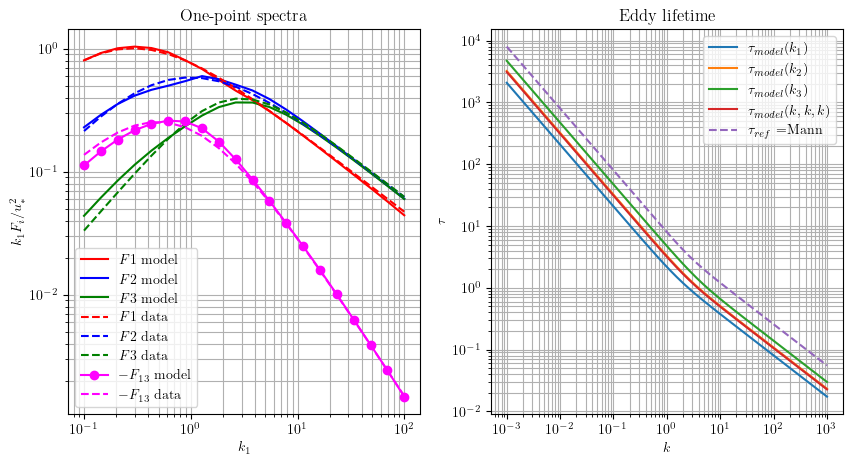

In [12]:
pb.plot(plt_dynamic=False)

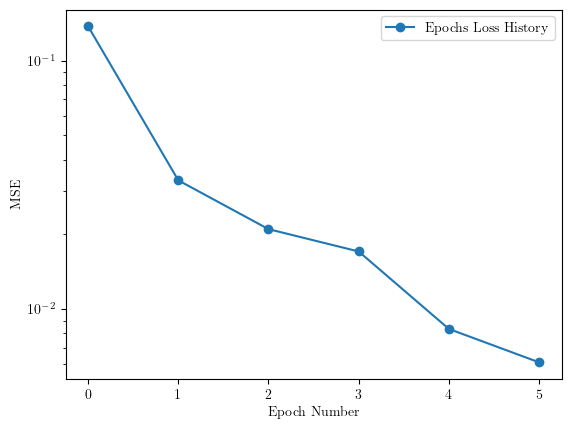

In [13]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot( pb.loss_history_epochs, 'o-', label="Epochs Loss History")
plt.legend()
plt.xlabel("Epoch Number")
plt.ylabel("MSE")
plt.yscale('log')

plt.show()
